# Assessment 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)
import pickle

We first import all the data sets and combine them into one data frame to be used later on (while making some immaterial adjustments to the data).

In [2]:
df_1 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS1.zip",header=None)
df_2 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS2.zip",header=None)
df_3 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS3.zip",header=None)
df_4 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS4.zip",header=None)

C:\Users\corri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\corri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


We need to add headers to each data set. The headers below are based off of the headers given with the data set but expanded slightly to allow for easier reading and understanding of the column.

In [3]:
colnames = (['source_ip', 'source_port', 'dest_ip', 'dest_port', 'proto', 'state', 'duration', 'source_bytes', 'dest_bytes', 'source_ttl',
             'dest_ttl', 'source_loss', 'dest_loss', 'service', 'source_load', 'dest_load', 'source_pkts', 'dest_pkts', 'source_TP_win', 'dest_TP_win', 
             'source_tcp_bn', 'dest_tcp_bn', 'source_mean_sz', 'dest_mean_sz', 'trans_depth', 'res_bdy_len', 'source_jitter', 'dest_jitter', 'start_time',
             'last_time', 'source_int_pk_time', 'dest_int_pk_time', 'tcp_rtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'count_state_ttl', 
             'count_flw_http_mthd', 'is_ftp_login', 'count_ftp_cmd', 'count_srv_source', 'count_srv_dest', 'count_dest_ltm',
             'count_source_ltm', 'count_source_destport_ltm', 'count_dest_sourceport_ltm', 'counts_dest_source_ltm', 'attack_cat', 'Label'])

In [4]:
df_1.columns = colnames
df_2.columns = colnames
df_3.columns = colnames
df_4.columns = colnames

In [5]:
frames = [df_1,df_2,df_3,df_4]
df = pd.concat(frames)

In [6]:
df.head()

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [7]:
df.shape

(2540047, 49)

So we have the right headers on the data and have the correct shape so we've done the right steps to get our data into one data frame.

### EDA

The properties of our data can cause errors when running neural networks on them. We look into the problems we may have with our data below during our elementary data analysis.

First we want to look for outliers to determine if we will have issues with too large values e.g. inf, or NaN values. Uncomment/comment the below code to allow visibility of all columns or the normal amount of columns (we need this since we have too many columns to display with normal options).

In [8]:
# pd.options.display.max_columns = None
pd.options.display.max_columns = 20

In [9]:
df.describe()

,duration,source_bytes,dest_bytes,source_ttl,dest_ttl,source_loss,dest_loss,source_load,dest_load,source_pkts,...,count_flw_http_mthd,is_ftp_login,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,Label
count,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,...,1.191902e+06,1.110168e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06
mean,6.587916e-01,4.339600e+03,3.642759e+04,6.278197e+01,3.076681e+01,5.163921e+00,1.632944e+01,3.695645e+07,2.450861e+06,3.328884e+01,...,2.345856e-01,3.969940e-02,9.206988e+00,8.988958e+00,6.439103e+00,6.900986e+00,4.642139e+00,3.592729e+00,6.845886e+00,1.264870e-01
std,1.392493e+01,5.640599e+04,1.610960e+05,7.462277e+01,4.285089e+01,2.251707e+01,5.659474e+01,1.186043e+08,4.224863e+06,7.628388e+01,...,7.940924e-01,1.996589e-01,1.083676e+01,1.082249e+01,8.162034e+00,8.205062e+00,8.477579e+00,6.174445e+00,1.125828e+01,3.323975e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353963e+05,1.191594e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145545e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925974e+06,4.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


From this we see that we have no concerns with infinite values and no conerns with NaN values. Standardisation may still be an issue here but this at least rules out complications with these specific values.

One of the considerations in the Neural Network workshop is floating point fragility. Below shows the maximum values in our data and also our maximum values running on both a GPU and a CPU.

In [10]:
df.max()

source_ip                     59.166.0.9
dest_ip                       59.166.0.9
proto                               zero
state                                 no
duration                         8786.64
source_bytes                    14355774
dest_bytes                      14657531
source_ttl                           255
dest_ttl                             254
source_loss                         5319
dest_loss                           5507
service                              ssl
source_load                    5.988e+09
dest_load                    1.28762e+08
source_pkts                        10646
dest_pkts                          11018
source_TP_win                        255
dest_TP_win                          255
source_tcp_bn                 4294958913
dest_tcp_bn                   4294953724
source_mean_sz                      1504
dest_mean_sz                        1500
trans_depth                          172
res_bdy_len                      6558056
source_jitter   

In [11]:
[np.finfo(np.float32).max, np.finfo(np.float64).max]

[3.4028235e+38, 1.7976931348623157e+308]

Thus we see that our maximums are much smaller than the maximum we can process and thus we should be fine.

In [12]:
attack_cat_counts = pd.DataFrame(df['attack_cat'].value_counts())
ac_names = attack_cat_counts.index.values
ac_names = np.delete(ac_names,0)
ac_counts = np.array(attack_cat_counts['attack_cat'])
ac_counts = np.delete(ac_counts,0)

label_counts = pd.DataFrame(df['Label'].value_counts())
label_names = ['normal','attack']
label_counts = np.array(label_counts['Label'])

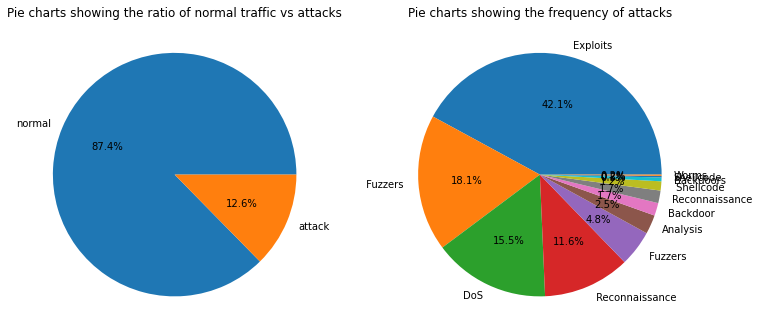

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,12))

ax[0].pie(label_counts, labels=label_names, autopct='%1.1f%%')

ax[1].pie(ac_counts, labels=ac_names, autopct='%1.1f%%')

ax[0].set_title('Pie charts showing the ratio of normal traffic vs attacks')
ax[1].set_title('Pie charts showing the frequency of attacks')

plt.show()

In [14]:
ac_names

array(['Exploits', ' Fuzzers ', 'DoS', ' Reconnaissance ', ' Fuzzers',
       'Analysis', 'Backdoor', 'Reconnaissance', ' Shellcode ',
       'Backdoors', 'Shellcode', 'Worms'], dtype=object)

### Pre-Processing

We need to pre-process our data before putting it into our neural network. This process takes place here.

Neural networks process mathematical data e.g. float64 or int64 so we want to turn all of our data into these data types. We'll check the data types we've got to work with and change these to the correct data types where they are objects.

In [15]:
lst = []

for head in colnames:
    if df[head].dtypes == 'O':
        lst.append(head)
        
print('The following columns need their data type changed to integer/float: ')
print('---------------------------------------------------------------------')
lst

The following columns need their data type changed to integer/float: 
---------------------------------------------------------------------


['source_ip',
 'source_port',
 'dest_ip',
 'dest_port',
 'proto',
 'state',
 'service',
 'count_ftp_cmd',
 'attack_cat']

The first adjustment we want to make is to sort the attack_cat column. Whenever there is no attack, we have NaN in this column so we're going to swap this for 'Normal' instead to make life easier down the road.

In [16]:
for i in range(2540047):
    if df.iloc[i,47] == 'NaN':
        df.iloc[i,47] = 'normal'

We now look at the columns with non integer entries and convert them to such so that they can be used in our neural networks. This is similar to the process I carried out in assessment 1 and may not be the quickest but is fairly foolproof so I'll keep using it here unless it creates issues with time.

In [17]:
df_source_ip = pd.DataFrame(df['source_ip'])
df_source_port = pd.DataFrame(df['source_port'])
df_dest_ip = pd.DataFrame(df['dest_ip'])
df_dest_port = pd.DataFrame(df['dest_port'])
df_proto = pd.DataFrame(df['proto'])
df_state = pd.DataFrame(df['state'])
df_service = pd.DataFrame(df['service'])
df_count_ftp_cmd = pd.DataFrame(df['count_ftp_cmd'])
df_attack_cat = pd.DataFrame(df['attack_cat'])

In [18]:
# we now create dictionaries to allow us to map onto the data frame

sip_dict = dict(zip(df_source_ip.index,df_source_ip['source_ip']))
sip_dict = {v: k for k, v in sip_dict.items()}

sp_dict = dict(zip(df_source_port.index,df_source_port['source_port']))
sp_dict = {v: k for k, v in sp_dict.items()}

dip_dict = dict(zip(df_dest_ip.index,df_dest_ip['dest_ip']))
dip_dict = {v: k for k, v in dip_dict.items()}

dp_dict = dict(zip(df_dest_port.index,df_dest_port['dest_port']))
dp_dict = {v: k for k, v in dp_dict.items()}

p_dict = dict(zip(df_proto.index,df_proto['proto']))
p_dict = {v: k for k, v in p_dict.items()}

state_dict = dict(zip(df_state.index,df_state['state']))
state_dict = {v: k for k, v in state_dict.items()}

service_dict = dict(zip(df_service.index,df_service['service']))
service_dict = {v: k for k, v in service_dict.items()}

cfc_dict = dict(zip(df_count_ftp_cmd.index,df_count_ftp_cmd['count_ftp_cmd']))
cfc_dict = {v: k for k, v in cfc_dict.items()}

ac_dict = dict(zip(df_attack_cat.index,df_attack_cat['attack_cat']))
ac_dict = {v: k for k, v in ac_dict.items()}

In [19]:
# we map these dictionaries onto our data frames
df['source_ip_int'] = df['source_ip'].map(sip_dict)
df['source_port_int'] = df['source_port'].map(sp_dict)
df['dest_ip_int'] = df['dest_ip'].map(dip_dict)
df['dest_port_int'] = df['dest_port'].map(dp_dict)
df['proto_int'] = df['proto'].map(p_dict)
df['state_int'] = df['state'].map(state_dict)
df['service_int'] = df['service'].map(service_dict)
df['count_ftp_cmd_int'] = df['count_ftp_cmd'].map(cfc_dict)
df['attack_cat_int'] = df['attack_cat'].map(ac_dict)

In [20]:
# we now drop the original columns since they are replicated in the above columns
df = df.drop('source_ip',axis=1)
df = df.drop('source_port',axis=1)
df = df.drop('dest_ip',axis=1)
df = df.drop('dest_port',axis=1)
df = df.drop('proto',axis=1)
df = df.drop('state',axis=1)
df = df.drop('service',axis=1)
df = df.drop('count_ftp_cmd',axis=1)
df = df.drop('attack_cat',axis=1)

In [21]:
df.dtypes

duration                     float64
source_bytes                   int64
dest_bytes                     int64
source_ttl                     int64
dest_ttl                       int64
source_loss                    int64
dest_loss                      int64
source_load                  float64
dest_load                    float64
source_pkts                    int64
dest_pkts                      int64
source_TP_win                  int64
dest_TP_win                    int64
source_tcp_bn                  int64
dest_tcp_bn                    int64
source_mean_sz                 int64
dest_mean_sz                   int64
trans_depth                    int64
res_bdy_len                    int64
source_jitter                float64
dest_jitter                  float64
start_time                     int64
last_time                      int64
source_int_pk_time           float64
dest_int_pk_time             float64
tcp_rtt                      float64
synack                       float64
a

So we now have all of the data in the correct type to be able to use in a neural network!

### Scaling

In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [23]:
def preprocess(data,scaling=None):
    data = data.astype(np.float)
    if(scaling == None):
        scaling = StandardScaler()
        datat=scaling.fit_transform(data)
    else:
        datat=scaling.transform(data)
    return(datat,scaling)

In [24]:
dfscaled = preprocess(df)

### Model

In [25]:
#!pip3 install tensorflow-gpu keras

In [26]:
import tensorflow as tf

In [27]:
tf.config.list_physical_devices('GPU')

[]

In [28]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
Y = np.array(df['attack_cat_int'])
X = df
X = X.drop('attack_cat_int', axis = 1)
X = X.values

In [39]:
U = np.array(df['Label'])
Z = df
Z = Z.drop('Label', axis = 1)
Z = Z.values

In [36]:
model = Sequential()
model.add(Dense(24, input_dim=X.shape[1], activation='relu'))
model.add(Dense(X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model.fit(X, Y, epochs=10, batch_size = 100)

Epoch 1/10
25401/25401 [==============================] - 12s 474us/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/10
25401/25401 [==============================] - 12s 492us/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/10
25401/25401 [==============================] - 12s 483us/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/10
25401/25401 [==============================] - 12s 476us/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/10
25401/25401 [==============================] - 12s 474us/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/10
25401/25401 [==============================] - 12s 474us/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/10
25401/25401 [==============================] - 12s 469us/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/10
25401/25401 [==============================] - 12s 473us/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/10
25401/25401 [==============================] - 12s 476us/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/10
25401/25401 [===

First attempt and we ended up with nan loss! Need to look into what went wrong!

In [40]:
model2 = Sequential()
model2.add(Dense(24, input_dim=Z.shape[1], activation='relu'))
model2.add(Dense(Z.shape[1], activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model2.fit(Z, U, epochs=1, batch_size = 100)

25401/25401 [==============================] - 14s 516us/step - loss: nan - accuracy: 0.8737


So using binary labels instead of attack types at least gets us an accuracy. We sill have a nan loss though!